In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv("NHIS_OPEN_GJ_2017_3.csv", encoding='cp949', nrows=9000)
df

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8995,9011,1,30,165,80,87.0,129.0,87.0,85.0,216.0,3.0,1.0
8996,8996,9012,1,75,150,55,89.0,130.0,62.0,89.0,101.0,1.0,0.0
8997,8997,9013,2,65,145,60,86.0,167.0,99.0,102.0,256.0,1.0,0.0
8998,8998,9014,2,40,150,60,74.0,134.0,89.0,99.0,198.0,1.0,1.0


In [5]:
X = df[['체중', '신장', '허리둘레', '흡연상태']]
Y = df['성별']

scaler = StandardScaler()
scaler.fit(X) # 주성분 찾기
X_scaled = scaler.transform(X) # 데이터 회전, 차원 축소

In [6]:
from sklearn.decomposition import PCA

# 데이터의 처음 2개의 주성분만 유지
pca = PCA(n_components=2) # 2차원 축소
pca.fit(X_scaled) # pca 모델 생성

# 처음 2개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (9000, 4)
축소된 데이터 형태: (9000, 2)


In [7]:
# 원본 데이터는 4개의 특성(체중, 신장, 허리둘레, 흡연상태)을 가지고 있다.
# 축소를 하자 2개의 특성만 남게 된 것을 확인할 수 있다.

Text(0, 0.5, '두번째 주성분')

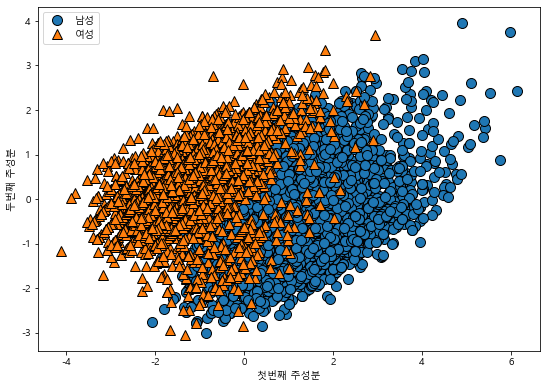

In [8]:
# 클래스를 색깔로 구분하여 처음 2개의 주성분을 그래프로 나타낸다
# 축소된 데이터를 바탕으로 남성, 여성 클래스로 분리
import mglearn

plt.figure(figsize=(9,9))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], Y)
plt.legend(['남성', '여성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')